# Open Exploration


## Feature Scoring & Dimensional Stacking

This notebook provides information regarding uncertain factors. First step was to perform a feature scoring in order to identify the most important uncertainties based on the/our outcomes of interest. Using these influential uncertainties, a pivot table was created by applying dimenisonal stacking

In [2]:
#Remember to delete it in the end
import warnings
warnings.filterwarnings('ignore')

# Feature Scoring

In [3]:
# Import the necessary libraries
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import networkx as nx

#from datetime import datetime
from ema_workbench import load_results
#from ema_workbench.analysis import pairs_plotting
#from ema_workbench.analysis import prim

In [4]:
#Import the results
experiment_datetime = "20230614T1806" ## change these 2 lines based on filename you want to read in
experiment_type = "all_generated" ## "fixed_policies" or "generate_all"
results = load_results('./output/' + experiment_datetime + '_results__' + experiment_type)

In [5]:
experiments, outcomes = results

In [6]:
#Structure of the results
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,35,301.770748,10.0,0.999767,214.532923,10.0,0.858394,54.747238,10.0,0.639790,...,8,0,3,8,2,1,1,10,0,dikesnet
1,3,152.859694,1.0,0.093190,302.788330,1.0,0.784320,123.031704,10.0,0.617487,...,8,0,3,8,2,1,1,11,0,dikesnet
2,36,262.899900,1.5,0.368725,102.087827,10.0,0.529150,273.501526,1.5,0.677412,...,8,0,3,8,2,1,1,12,0,dikesnet
3,110,127.568875,1.5,0.273233,149.172227,1.0,0.855730,136.051742,10.0,0.640207,...,8,0,3,8,2,1,1,13,0,dikesnet
4,37,51.992459,1.0,0.645585,222.914316,10.0,0.140935,316.821906,10.0,0.822794,...,8,0,3,8,2,1,1,14,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,8,56.246266,1.5,0.486501,96.845090,1.5,0.241070,189.548294,1.5,0.800373,...,3,5,5,6,9,5,2,5005,9,dikesnet
49996,103,306.033261,1.5,0.882114,217.981155,1.0,0.104000,57.773526,1.5,0.125431,...,3,5,5,6,9,5,2,5006,9,dikesnet
49997,108,41.202133,10.0,0.183327,286.658507,1.5,0.327111,164.780193,1.5,0.098742,...,3,5,5,6,9,5,2,5007,9,dikesnet
49998,122,194.427827,1.5,0.779804,259.750250,1.5,0.696507,171.288053,10.0,0.486726,...,3,5,5,6,9,5,2,5008,9,dikesnet


The outcomes of interest are:

1. Deaths to DR4
2. Damages in DR4
3. Total infrastructure costs (all DRs)
4. Total deaths (all DRs)
5. Total damages (all DRs)

Based on the above outcomes, feature scoring is performed for all the 52 uncertainties and the following outcomes:
1. A1 Expected Annual Damage/ Expected Annual Death
2. A2 Expected Annual Damage/ Expected Annual Death
3. A3 Expected Annual Damage/ Expected Annual Death
4. A4 Expected Annual Damage/ Expected Annual Death
5. A5 Expected Annual Damage/ Expected Annual Death
6. Total Infrastructure Costs
7. Total Expected Annual Damage
8. Total Expected Number of Deaths

In [ ]:
from ema_workbench.analysis import feature_scoring

In [ ]:
# All uncertainties and policy levers
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(fs, cmap="viridis", annot=True, ax=ax)
plt.savefig('./output/FeatureScoring_uncertainties.png')
plt.show()

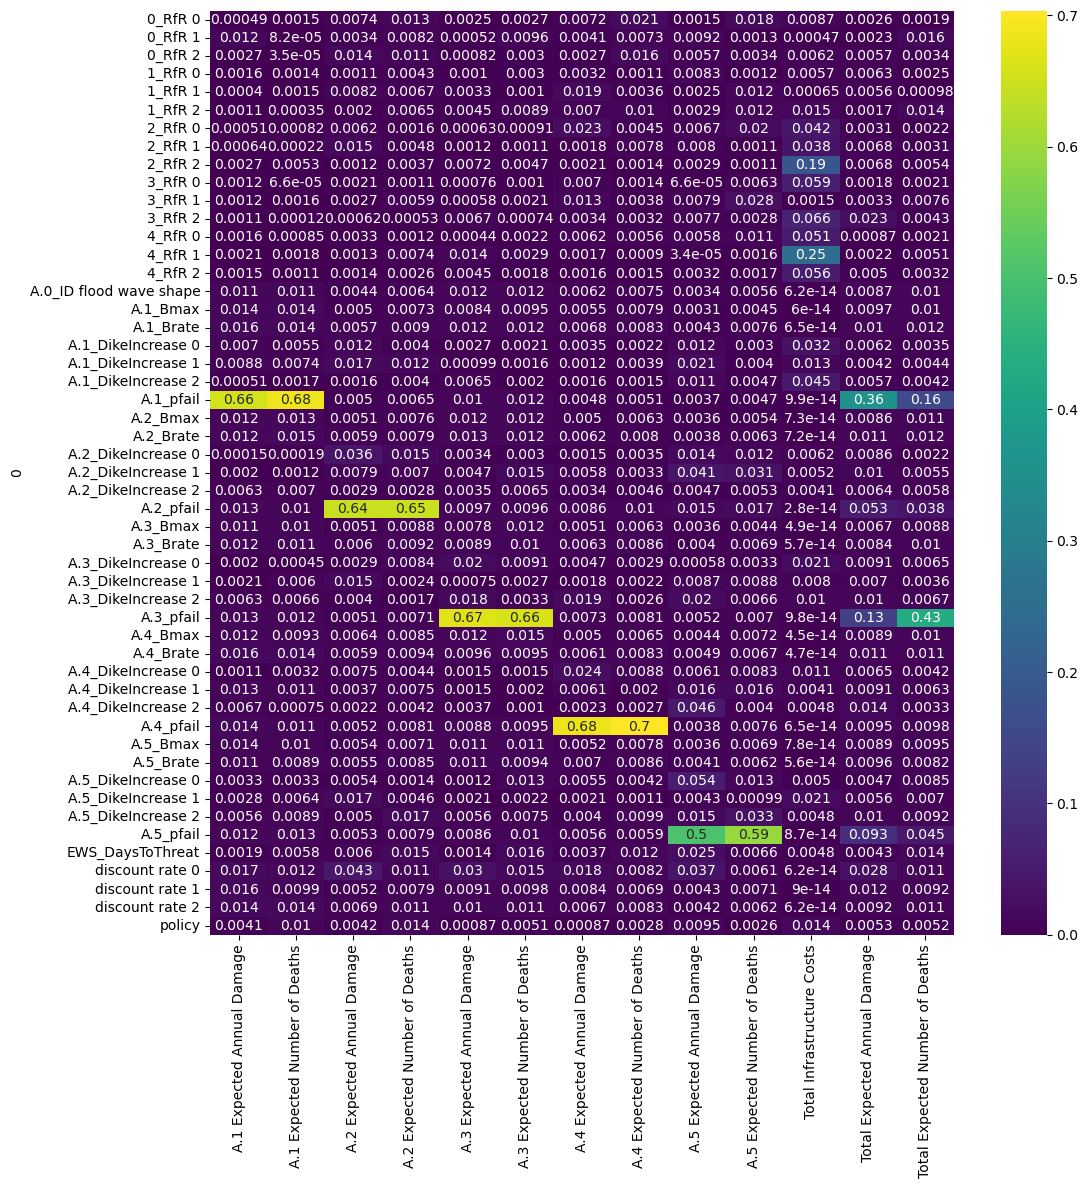

In [7]:
# All uncertainties and policy levers
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(fs, cmap="viridis", annot=True, ax=ax)
plt.savefig('./output/FeatyreScoring.png')
plt.show()


# Dimensional Stacking

### Most relevant uncertainties
Out of the 52 uncertain it was found with feature scoring that A4 Pfail is highly corralated with A4 expected number of deathts and A4 expected number of damages. While also ...

In [9]:
experiments, outcomes = results
experiments_df = pd.DataFrame(experiments)
outcomes_df = pd.DataFrame(outcomes)

In [10]:
#Print all the 52 uncertainties
#experiments_df.info()

### A. Dike Ring 4
**A.4 Expected Number of Deaths**

*4 Uncertainties* 
1. 99%
2. 90%
3. 6% of the highest value

*All Uncertainties* 
1. 99%
2. 90%
3. 6% of the highest value


35572    0.023367
36072    0.019305
36726    0.018477
36968    0.018143
39117    0.015987
Name: A.4 Expected Number of Deaths, dtype: float64

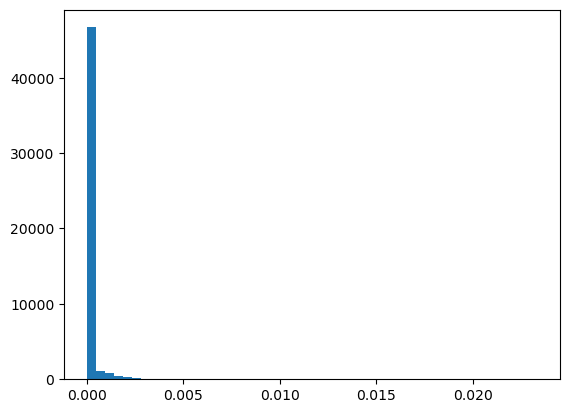

In [100]:
plt.hist(outcomes_df["A.4 Expected Number of Deaths"],bins=50)
outcomes_df["A.4 Expected Number of Deaths"].nlargest(5)

In [183]:
# Calculate the total number of values in the column
total_values = len(outcomes_df["A.4 Expected Number of Deaths"])

# Calculate the number of values greater than ..
greater_than = len(outcomes_df[outcomes_df["A.4 Expected Number of Deaths"] < 0.00003])

# Calculate the percentage
percentage = (greater_than/ total_values) * 100

# Print the result
print(f"The percentage is: {percentage:.2f}%")

The percentage is: 82.27%


In [158]:
outcomes_df["over_threshold"] = pd.Series()
#So 80% of the time, the value is 0
# Set the values in the "over_threshold" column based on the condition
outcomes_df.loc[outcomes_df["A.4 Expected Number of Deaths"] < 0.0001, "over_threshold"] = outcomes_df["A.4 Expected Number of Deaths"]

(array([40359.,    61.,   713.,   547.,   586.,   141.,   134.,   266.,
          262.,   108.]),
 array([0.00000000e+00, 9.99849737e-06, 1.99969947e-05, 2.99954921e-05,
        3.99939895e-05, 4.99924868e-05, 5.99909842e-05, 6.99894816e-05,
        7.99879790e-05, 8.99864763e-05, 9.99849737e-05]),
 <BarContainer object of 10 artists>)

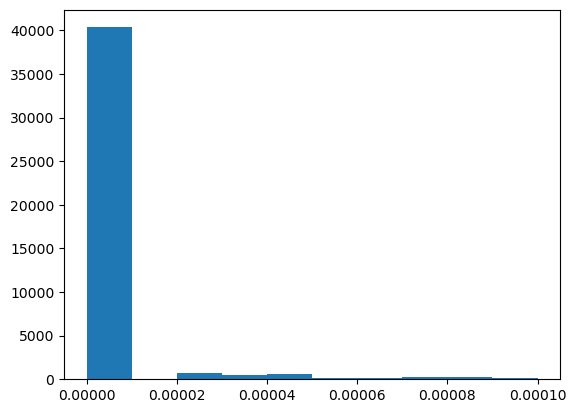

In [159]:
plt.hist(outcomes_df["over_threshold"])

In [13]:
from ema_workbench.analysis import dimensional_stacking

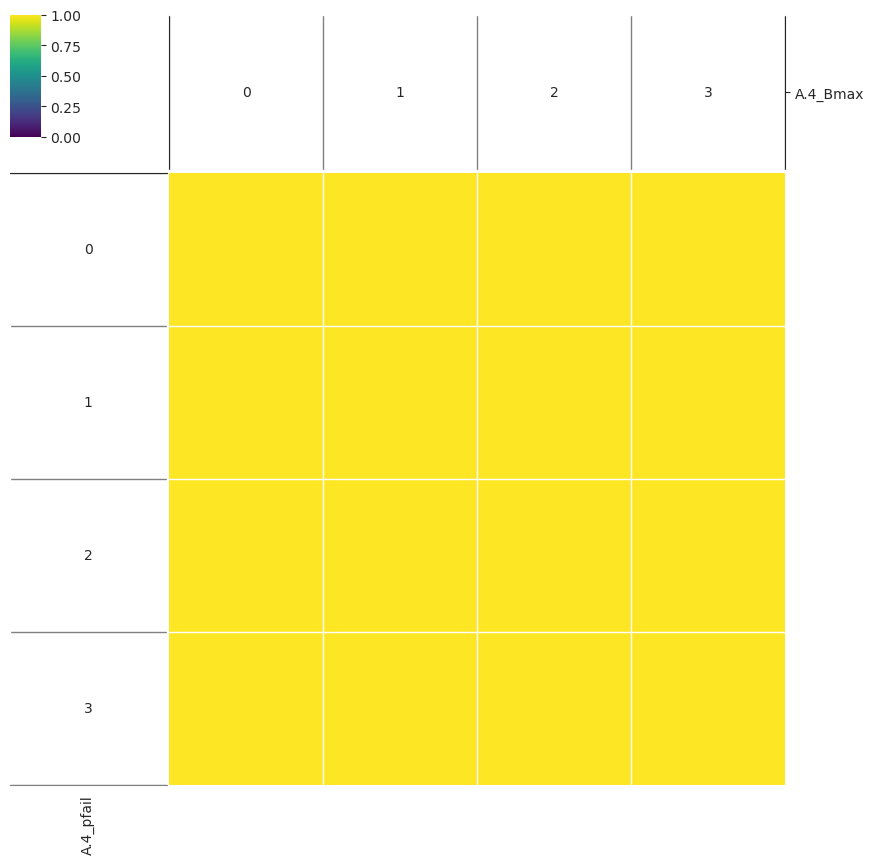

In [178]:
#Only with Dike 4 uncertainties
#99% of values
experiments_df2 = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail', 'A.4_DikeIncrease 0', "A.4_DikeIncrease 1", "A.4_DikeIncrease 2"]] 

x = experiments_df2
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.015
dimensional_stacking.create_pivot_plot(x, y, 1, nbins=4) 
plt.show()

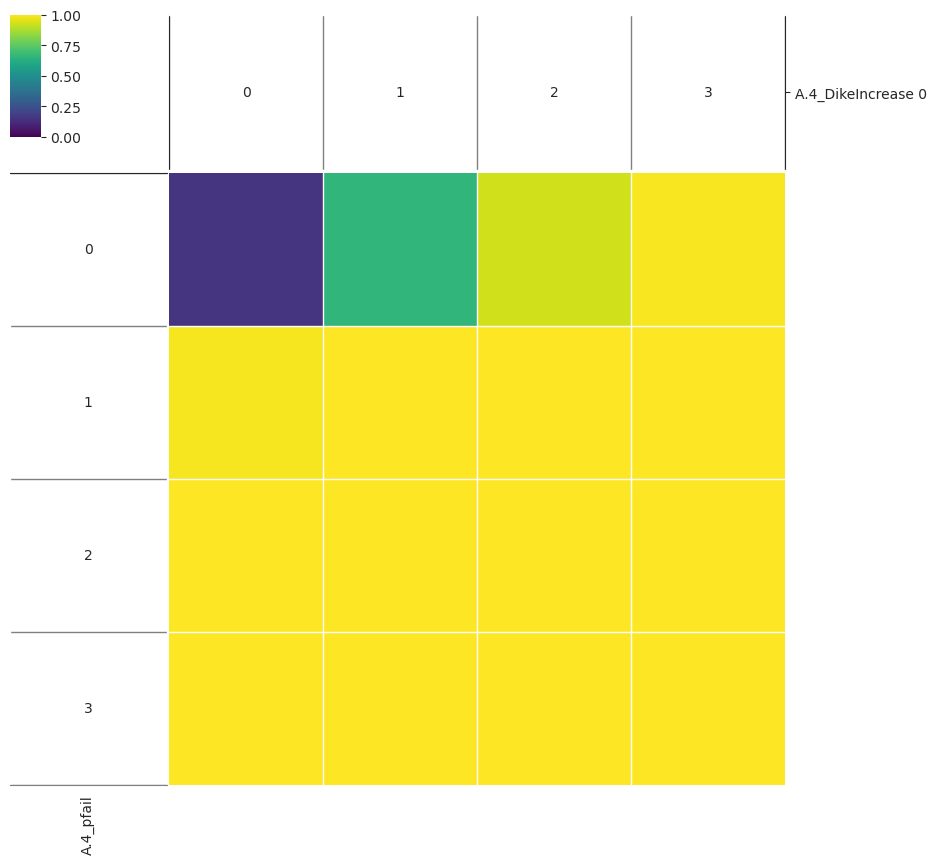

In [170]:
#Only with Dike 4 uncertainties
#90% of values 
experiments_df2 = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail', 'A.4_DikeIncrease 0', "A.4_DikeIncrease 1", "A.4_DikeIncrease 2"]] 

x = experiments_df2
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.0003
dimensional_stacking.create_pivot_plot(x, y, 1, nbins=4) 
plt.show()

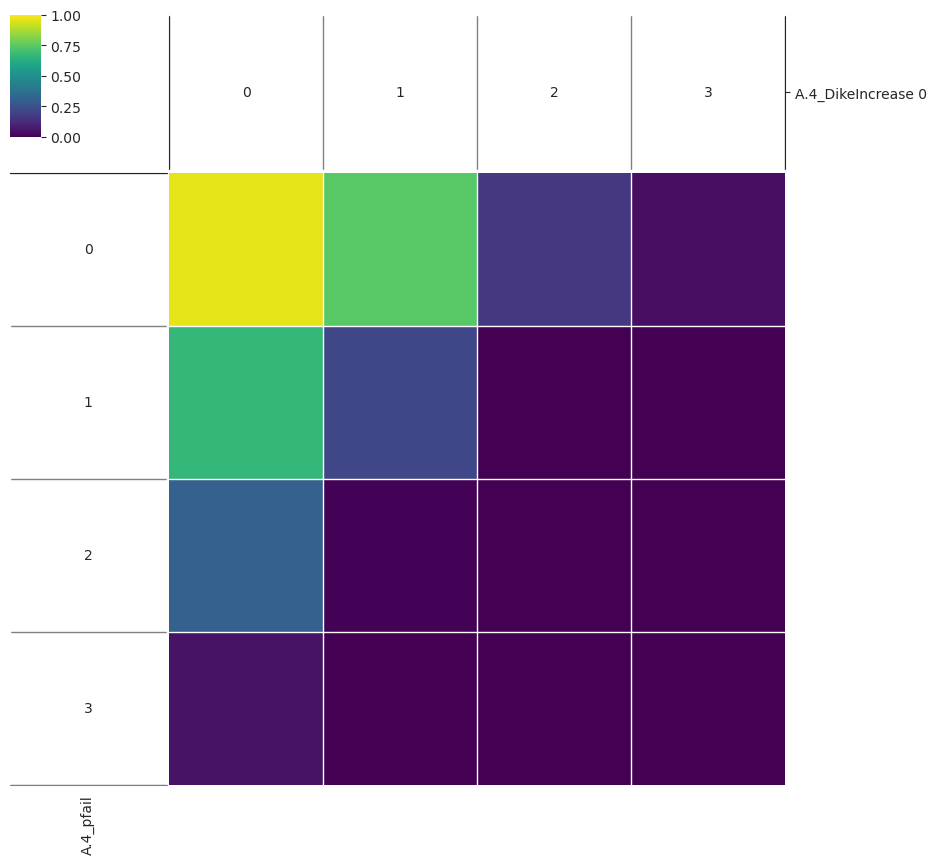

In [115]:
#Only with Dike 4 uncertainties
#The 6% of the highest values for total expected Annual Damage
experiments_df2 = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail', 'A.4_DikeIncrease 0', "A.4_DikeIncrease 1", "A.4_DikeIncrease 2"]] 

x = experiments_df2
y = outcomes_df["A.4 Expected Annual Damage"] > 0.0005
dimensional_stacking.create_pivot_plot(x, y, 1, nbins=4) 
plt.show()

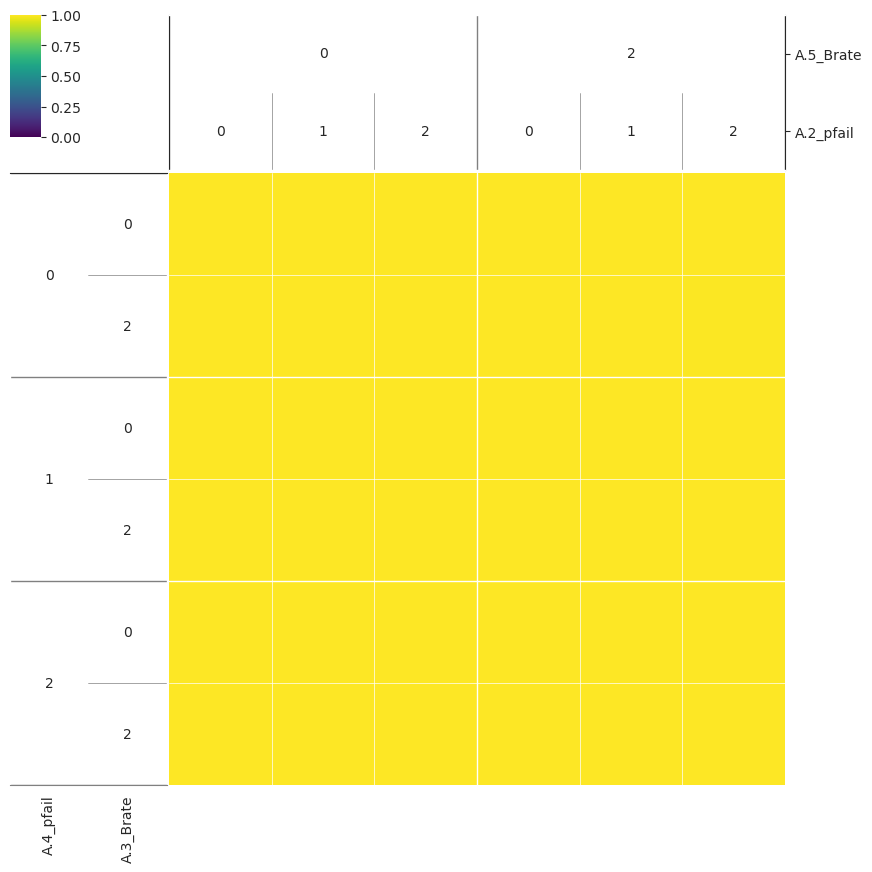

In [179]:
#With all the uncertainties
#99% of values
x = experiments_df
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.015
dimensional_stacking.create_pivot_plot(x, y, 2,) 
plt.show()

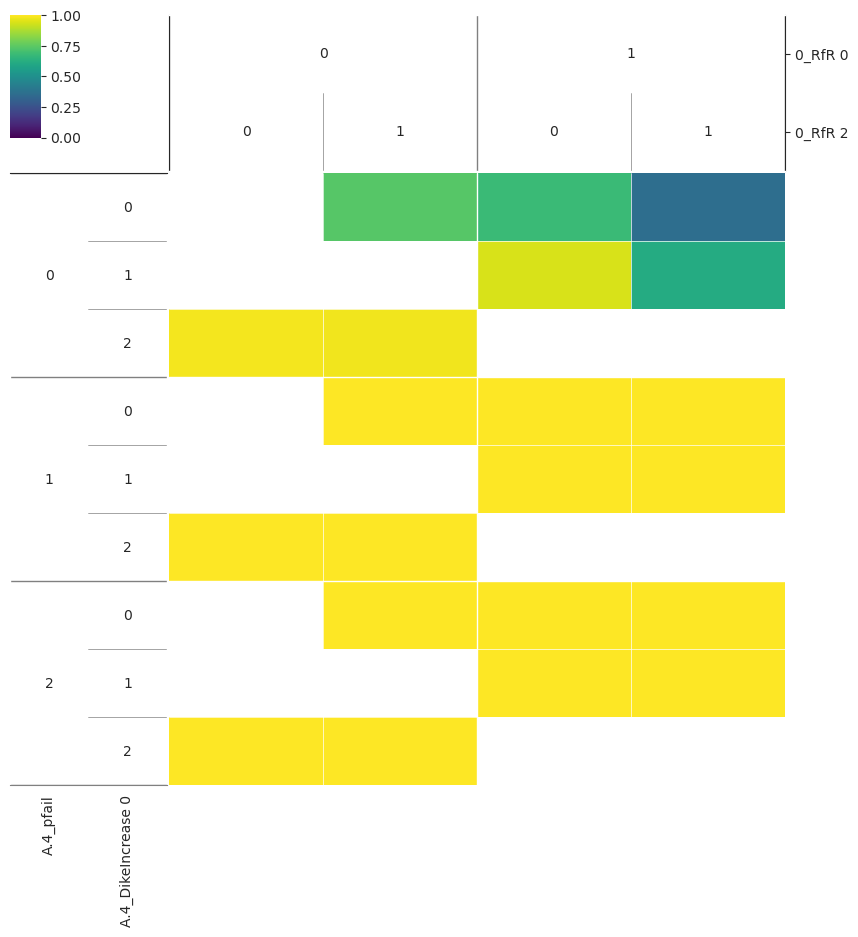

In [182]:
#With all the uncertainties
#90% of values
x = experiments_df
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.0003
dimensional_stacking.create_pivot_plot(x, y, 2,) 
plt.show()

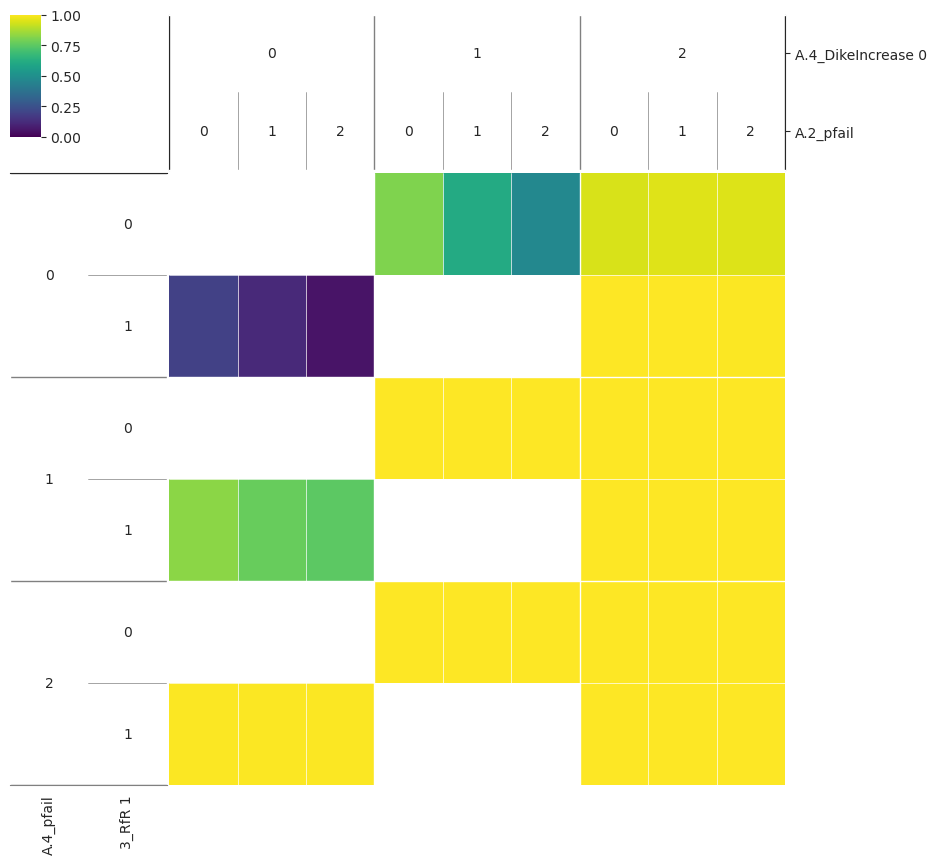

In [184]:
#80% < 0.00003
x = experiments_df
y = outcomes_df["A.4 Expected Number of Deaths"] <  0.00003
dimensional_stacking.create_pivot_plot(x, y, 2) 
plt.show()
#Makes sense since all the values are almost 0

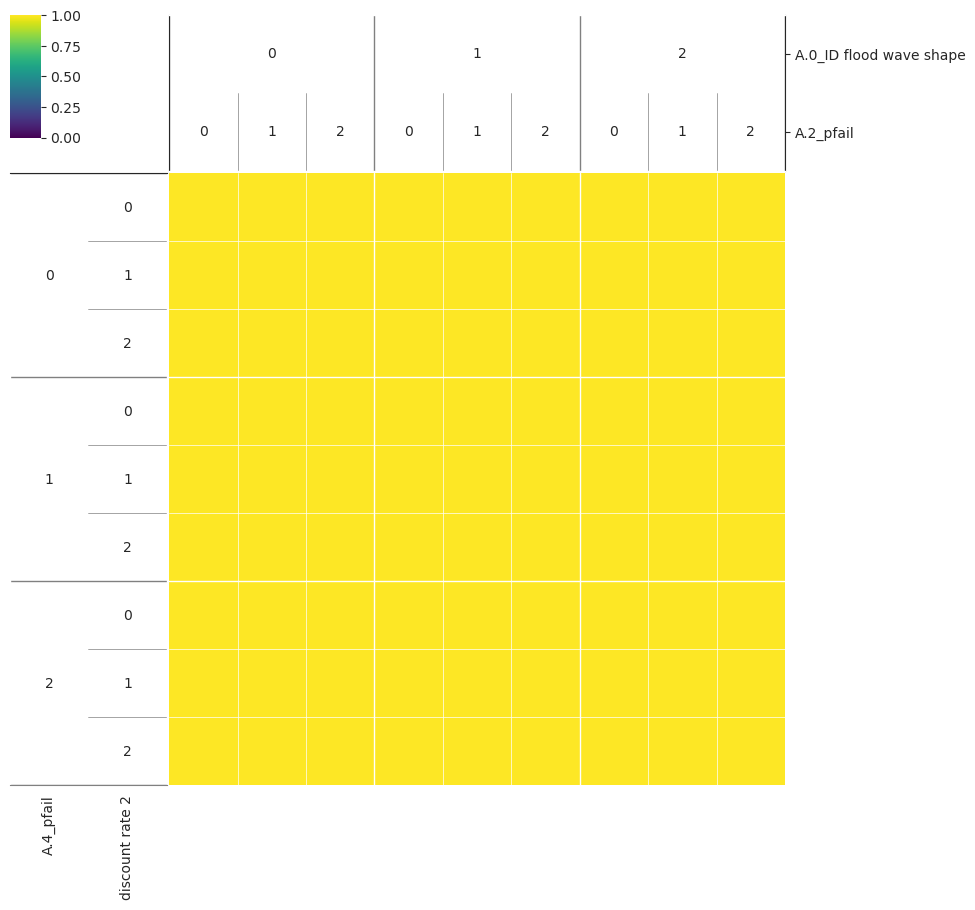

In [181]:
#With all the uncertainties
#6% of the highest values
x = experiments_df
y = outcomes_df["A.4 Expected Number of Deaths"] < 0.02
dimensional_stacking.create_pivot_plot(x, y, 2) 
plt.show()
#Makes sense since all the values are almost 0

### B2. Dike 4 Annual Damage
Just the 80%

In [185]:
# Calculate the total number of values in the column
total_values = len(outcomes_df["A.4 Expected Annual Damage"])

# Calculate the number of values greater than ..
greater_than = len(outcomes_df[outcomes_df["A.4 Expected Annual Damage"] < 0.00003])

# Calculate the percentage
percentage = (greater_than/ total_values) * 100

# Print the result
print(f"The percentage is: {percentage:.2f}%")

The percentage is: 79.87%


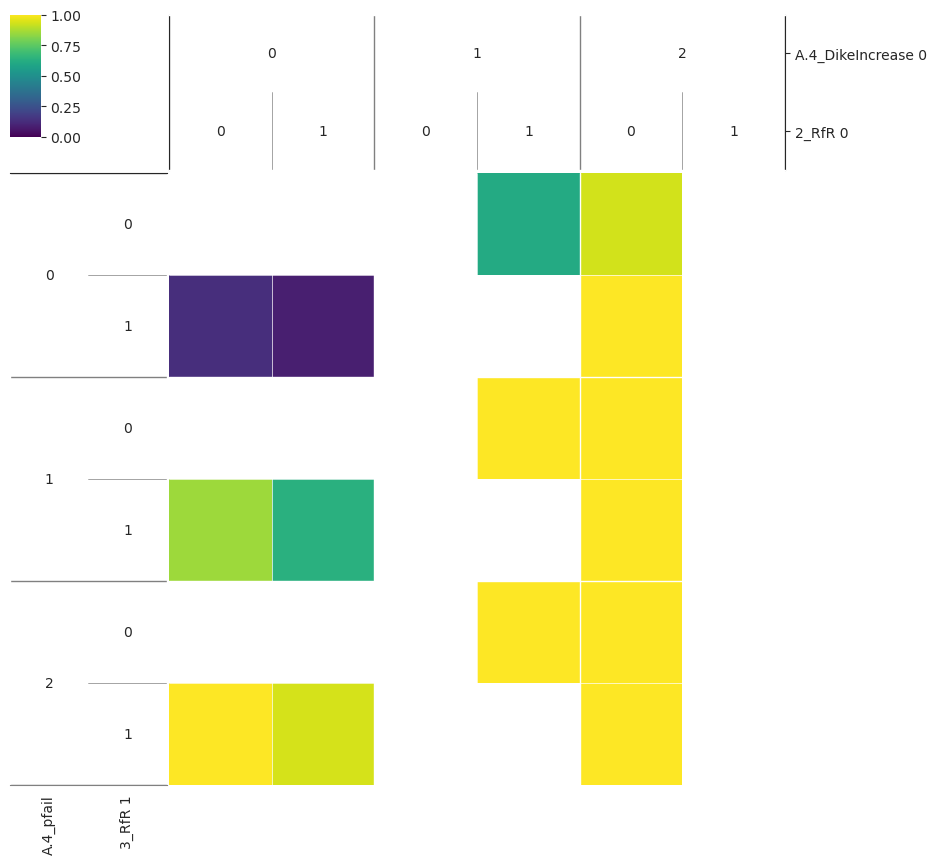

In [186]:
#80% 
x = experiments_df
y = outcomes_df["A.4 Expected Annual Damage"] <  0.00003
dimensional_stacking.create_pivot_plot(x, y, 2) 
plt.show()
#Makes sense since all the values are almost 0

### B. Total Infrastructure Costs

(array([[25000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 25000.],
        [25000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 25000.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

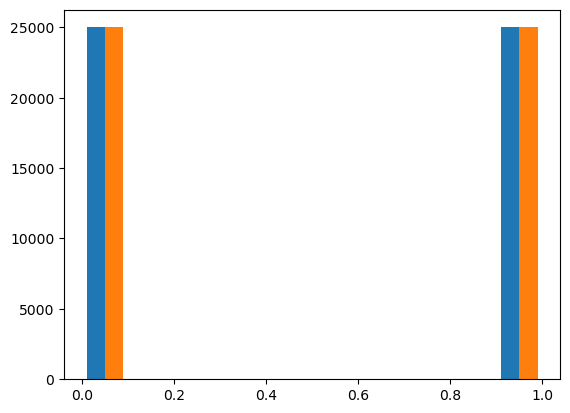

In [39]:
#Room for the River
experiments_dfCosts = experiments_df.loc[:, ['4_RfR 0','4_RfR 0']] 
plt.hist(experiments_dfCosts)

In [40]:
#Selected uncertainties/ NOT POSSIBLE

x = experiments_dfCosts
y = outcomes_df["Total Infrastructure Costs"] < 2.4*1000000000
dimensional_stacking.create_pivot_plot(x, y, 1) 
plt.show()

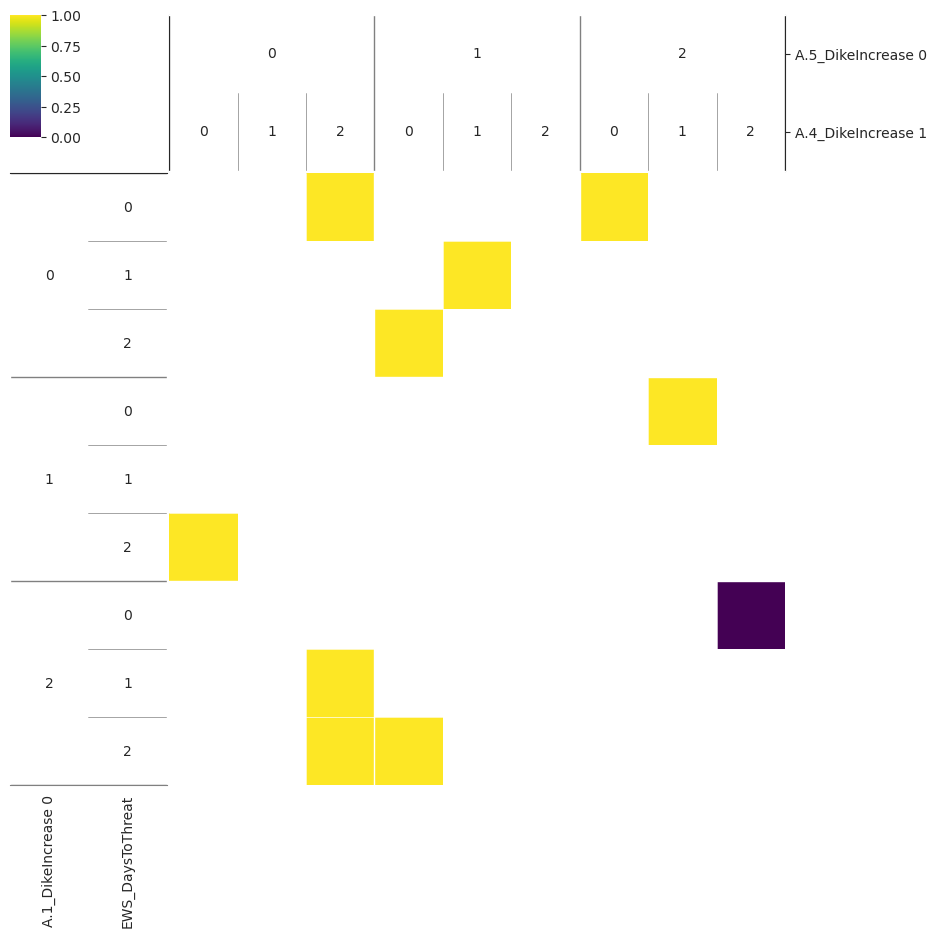

In [33]:
#With all the uncertainties - NOT USEFUL AT ALL
x = experiments_df
y = outcomes_df["Total Infrastructure Costs"] < 2.4*1000000000
dimensional_stacking.create_pivot_plot(x, y, 2) 
plt.show()

### C. Total Expected Number of Deaths

All uncertainties
1. 98%
2. 90%
3. 60%
4. 60% only pfails

39450    1.243043
39179    1.167150
37647    1.162491
21419    1.156948
38119    1.156519
Name: Total Expected Number of Deaths, dtype: float64

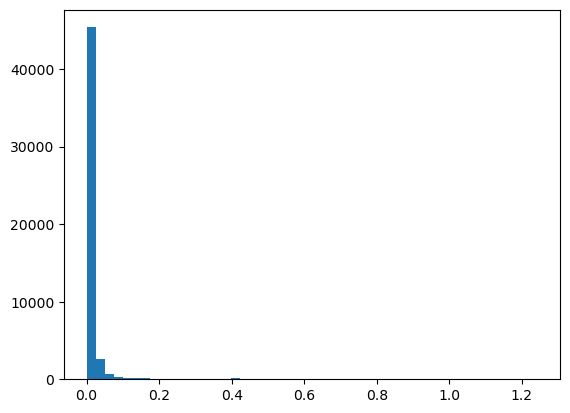

In [127]:
plt.hist(outcomes_df["Total Expected Number of Deaths"],bins=50)
outcomes_df["Total Expected Number of Deaths"].nlargest(5)

In [217]:
# Calculate the total number of values in the column
total_values = len(outcomes_df["Total Expected Number of Deaths"])

# Calculate the number of values greater than ..
greater_than = len(outcomes_df[outcomes_df["Total Expected Number of Deaths"] > 0.0])

# Calculate the percentage
percentage = (greater_than/ total_values) * 100

# Print the result
print(f"The percentage is: {percentage:.2f}%")

The percentage is: 21.44%


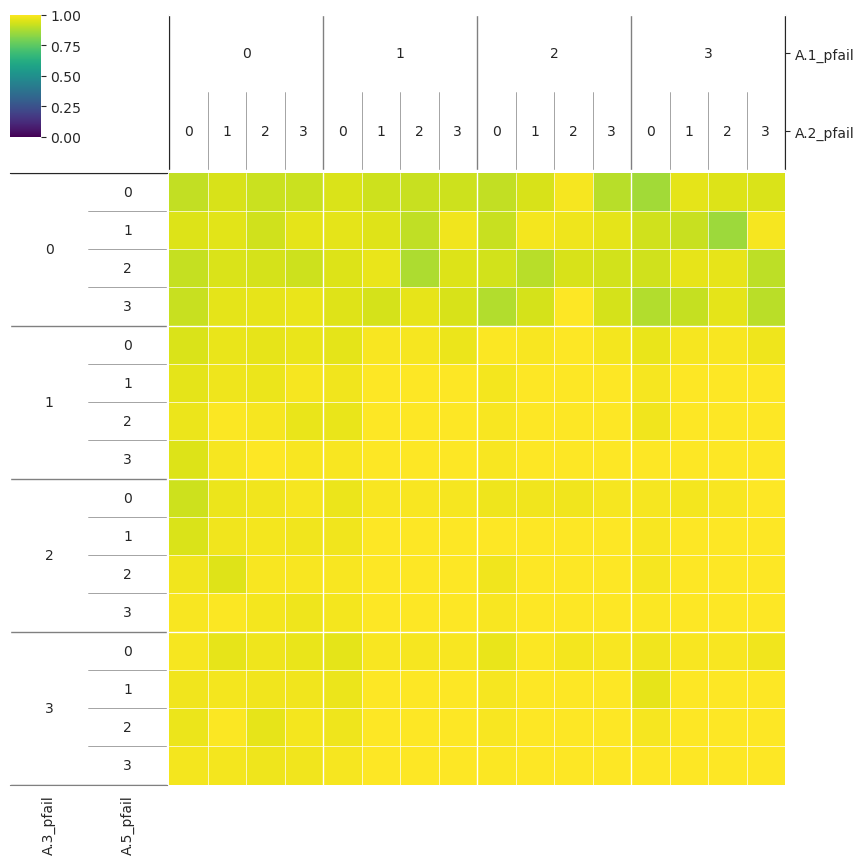

In [130]:
#98% of values
x = experiments_df
y = outcomes_df["Total Expected Number of Deaths"] <0.08
dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 
plt.show()

In [ ]:
#90% of values
x = experiments_df
y = outcomes_df["Total Expected Number of Deaths"] <0.08
dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 
plt.show()

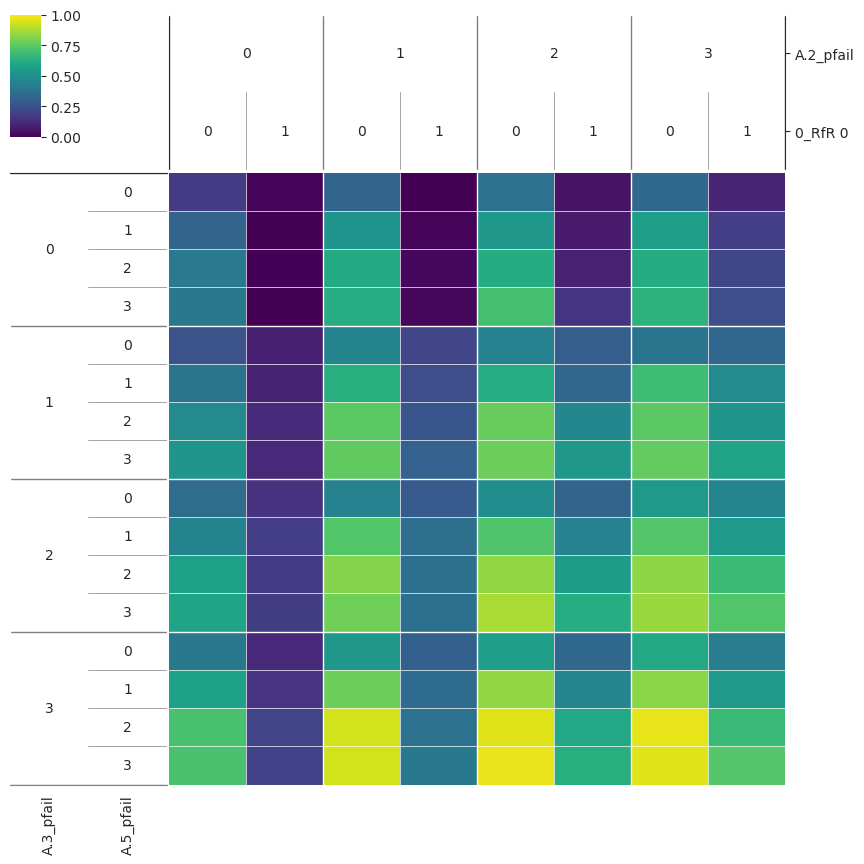

In [195]:
#60% 
x = experiments_df
y = outcomes_df["Total Expected Number of Deaths"] < 0.001
dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 
plt.show()

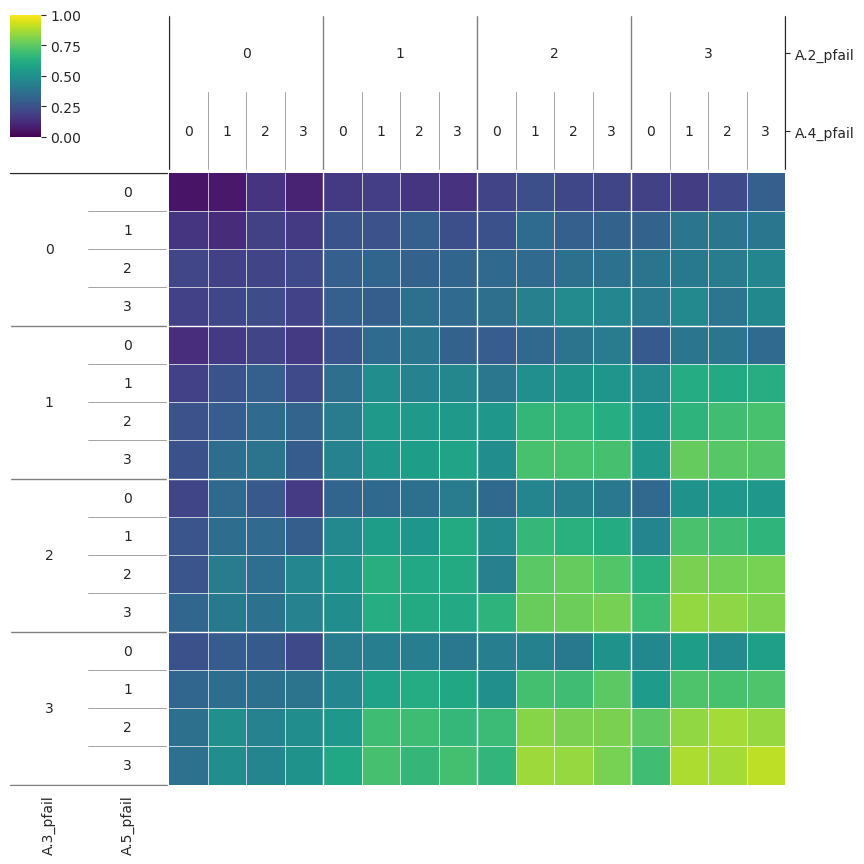

In [200]:
#60% Just the Pfail
experiments_dfPfail = experiments_df.loc[:, ["A.1_pfail", "A.2_pfail", "A.3_pfail","A.4_pfail","A.5_pfail","discount rate 0"]] 
x = experiments_dfPfail
y = outcomes_df["Total Expected Number of Deaths"] < 0.001
dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 
plt.show()

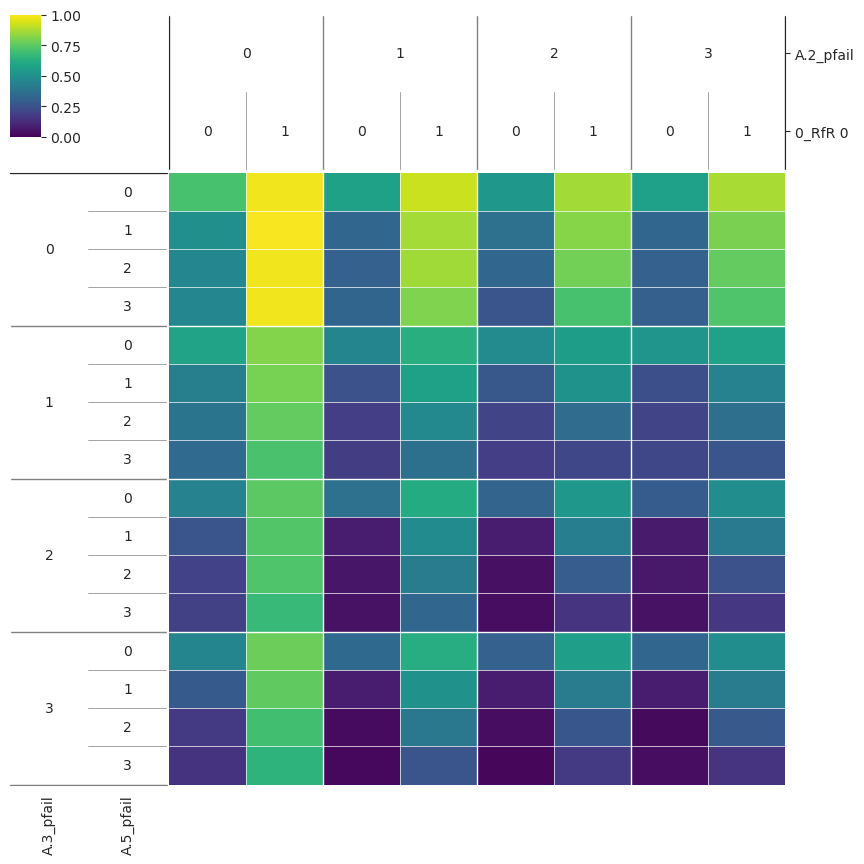

In [214]:
#40% of the highest values
x = experiments_df
y = outcomes_df["Total Expected Number of Deaths"] > 0.0021
dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 
plt.show()

### D. Total Expected Annual Damage

In [204]:
# Total number of values in the column
total_values = len(outcomes_df["Total Expected Annual Damage"])

# Calculate the number of values greater than ..
greater_than = len(outcomes_df[outcomes_df["Total Expected Annual Damage"] < 0.01 *1000000000])

# Calculate the percentage
percentage = (greater_than/ total_values) * 100

# Print the result
print(f"The percentage of values greater than 0.1 is: {percentage:.2f}%")

The percentage of values greater than 0.1 is: 58.34%


In [94]:
#experiments_dfPfail = experiments_df.loc[:, [ "A.2_pfail", "A.3_pfail","A.1_pfail","A.5_pfail"]] 

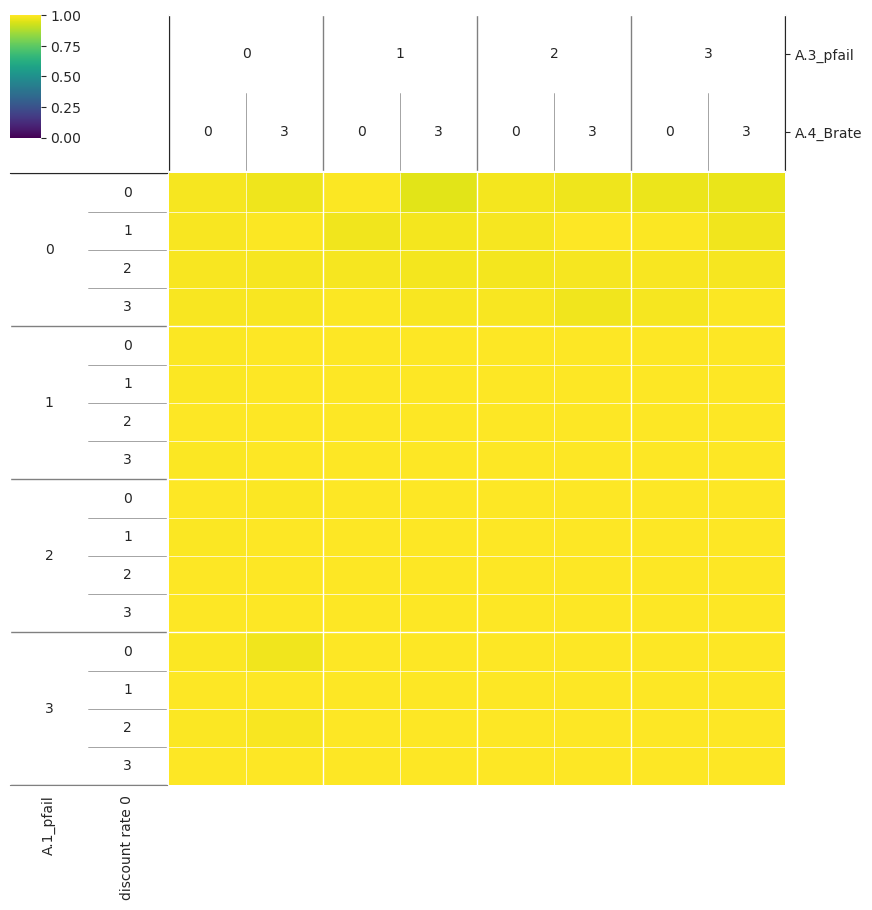

In [91]:
#99%
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["Total Expected Annual Damage"] < 1 *1000000000
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()

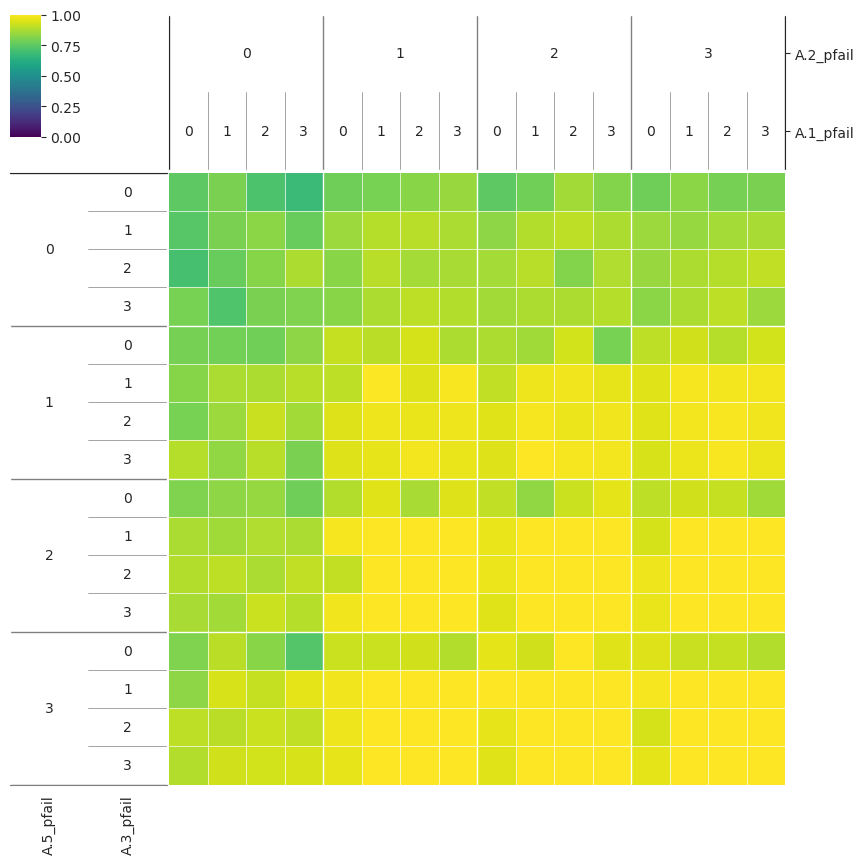

In [93]:
#90%
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["Total Expected Annual Damage"] < 0.1 *1000000000
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()

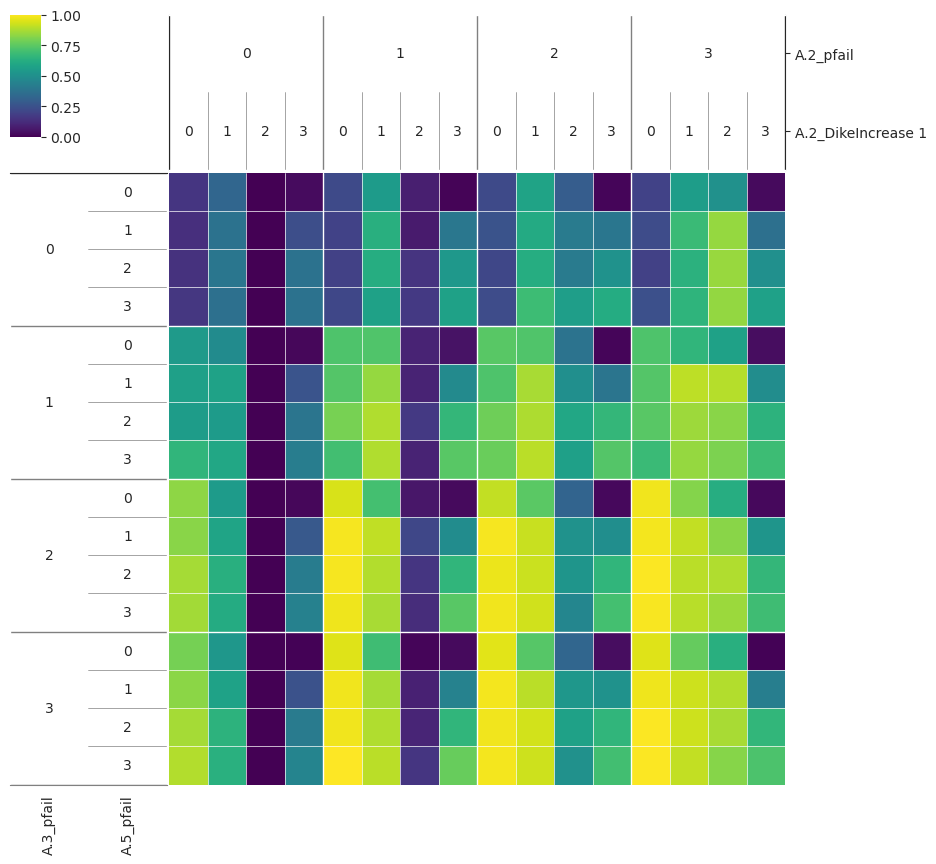

In [205]:
#60%
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["Total Expected Annual Damage"] < 0.01 *1000000000
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()

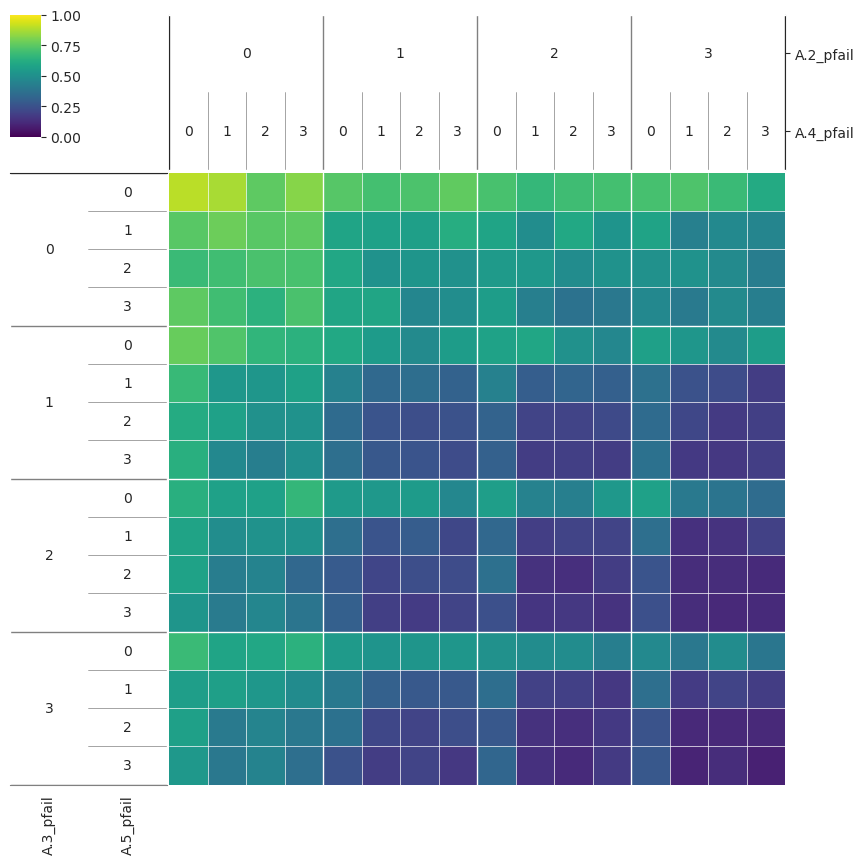

In [215]:
#The 40% values with the highest annual damage
x = experiments_df
y = outcomes_df["Total Expected Annual Damage"] > 0.01 *1000000000
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=4) 
plt.show()